#### Признаки:
1. **satisfaction_level** - Уровень удовлетворенности работой  
2. **Last_evaluation** - Время с момента последней оценки в годах  
3. **number_projects** - Количество проектов, выполненных за время работы  
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц  
5. **time_spend_company** - Стаж работы в компании в годах  
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником  
7. **left** - уволился ли сотрудник  
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет  
9. **department** - отдел в котором работает сотрудник  
10. **salary** - относительный уровень зарплаты

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Пропуски отсутствуют, не нужна предобработка.

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [3]:
# разделим массив на количественные и качественные данные
quantitative = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

qualitative = df[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']]

In [4]:
# для количестенных показателей рассчитаем среднее, СКО, минимум, медиану, максимум
quantitative.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


##### Краткий комментарий:
satisfaction_level:
 - медиана и среднее близки и находятся в диапазоне 61-64%
 - есть люди с крайне низким уровнем удовлетворенности
 
last_evaluation:
 - последняя оценка проводилась в среднем больше 8 месяцев назад
 
number_project:
 - сотрудники делают в среднем 4 проекта за время работы, минимум - 2

average_montly_hours:
 - в среднем сотрудники работают 200ч/мес или ~9ч/день (при 22 рабочих днях в месяц)
 
time_spend_company:
 - средний стаж сотрудника в компании - 4 года
 - минимальный стаж в 2 года, может свидетельствовать о невысокой текучести кадров

In [46]:
# для качественных показателей найдем моду, остальные метрики не информативны
qualitative.mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


In [27]:
df['department'].value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

In [28]:
df['salary'].value_counts(normalize=True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [35]:
qualitative['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [47]:
qualitative['Work_accident'].value_counts(normalize=True)

0    0.85539
1    0.14461
Name: Work_accident, dtype: float64

In [48]:
qualitative['promotion_last_5years'].value_counts(normalize=True)

0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64

Самое большое количество сотрудников за рассматриваемый период работало в отделе продаж. Большая часть сотрудников в датасете - низкооплачиваемые. Уволившихся сотрудников - меньшинство,  основном  датасете предстален текущий персонал. Несчатные случаи на рабочем месте имеют место, что-то более конкретное можно будет сказать только после более глубокого узучения с использованием дополнительной информации о характере травм и обстоятельстах случившегося. Подавляющее большинство сотрудников из датасета не промоутилось за последние 5 лет.

## 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.  
## Определите две самые скоррелированные и две наименее скоррелированные переменные.

<AxesSubplot:>

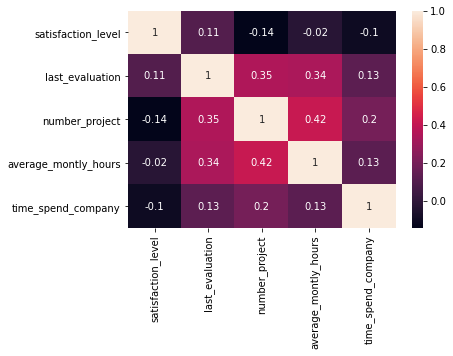

In [4]:
sns.heatmap(quantitative.corr(), annot=True)

Отметим общий низкий уровень корреляции между показателями (< 0.5).  

Некоторый уровень корреляции (0.42) наблюдается между общим количестом проектов, выполненных сотрудником, и среднемесячными рабочими часами. Он выделяется на общем фоне, однако, нельзя сказать, что между показателями существует устойчивая сильная связь. Предположу, что связь носит нелинейный характер: до какого-то момента увеличение рабочих часов действительно увеличивает количество реализованных проектов, но со временем приводит к переутомлению и производительность резко падает.  

Наименьшую взаимосвязь показали среднемесячные рабочие часы и уровень удовлетворенности сотрудников (-0.02). Предварительный анализ показывает, что в среднем сотрудники не перерабатывают, возможно у большинства есть регламентированные рабочие часы, на которые они не могут повлиять, что объясняет отсутствие связи с уровнем удовлетворенности работой.

## 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [12]:
# оставим только действующих сотрудников (left=0)
staff = df.loc[df['left']==0]

staff.pivot_table(index='department', columns='left', values='number_project', aggfunc='count', margins=True).reset_index().sort_values(by=0)

left,department,0,All
3,hr,524,524
4,management,539,539
2,accounting,563,563
5,marketing,655,655
1,RandD,666,666
6,product_mng,704,704
0,IT,954,954
8,support,1674,1674
9,technical,2023,2023
7,sales,3126,3126


Больше всего сотрудников работает в продажах, а самый малочисленный отдел - HR.

## 5. Показать распределение сотрудников по зарплатам.

In [6]:
# сгруппируем данные по текущему и уволившемуся персоналу, а также по уровню зарплат
salary_left_grouped = df.loc[:, ['salary', 'department', 'left']].groupby(['left', 'salary']).count().reset_index()
salary_left_grouped

,left,salary,department
0,0,high,1155
1,0,low,5144
2,0,medium,5129
3,1,high,82
4,1,low,2172
5,1,medium,1317


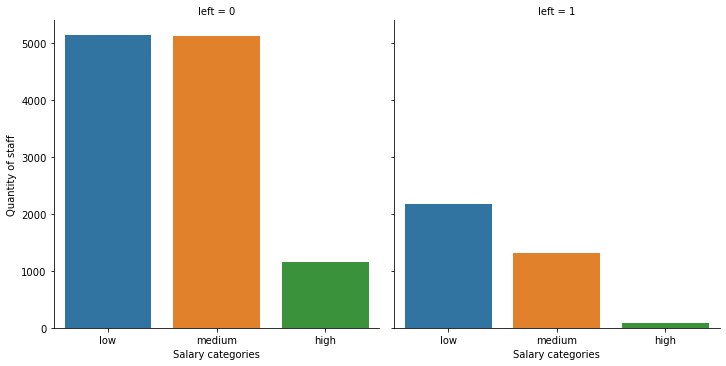

In [7]:
categories_order = ['low', 'medium', 'high']
ax = sns.catplot(data=salary_left_grouped, x='salary', y='department', col='left', kind='bar', order=categories_order)

ax.set_axis_labels('Salary categories', 'Quantity of staff')

В компании больше всего низкооплачиваемых сотрудников, которые, что логично, увольняются чаще.

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [37]:
# для целей анализа возьмем только действующих сотрудников
dept_salary = staff.pivot_table(index='department', columns='salary', values='left', aggfunc='count')
dept_salary

salary,high,low,medium
department,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


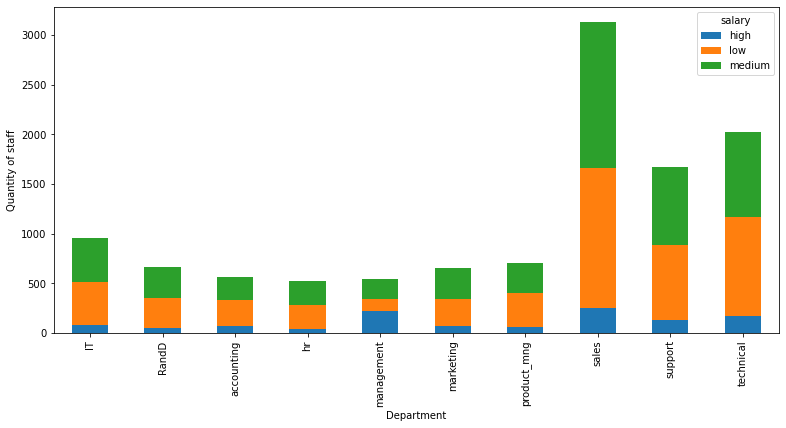

In [46]:
dept_salary.plot(kind='bar', xlabel='Department', ylabel='Quantity of staff', stacked=True)

from pylab import rcParams
rcParams['figure.figsize'] = 13,6

<AxesSubplot:xlabel='Department', ylabel='Share of staff, %'>

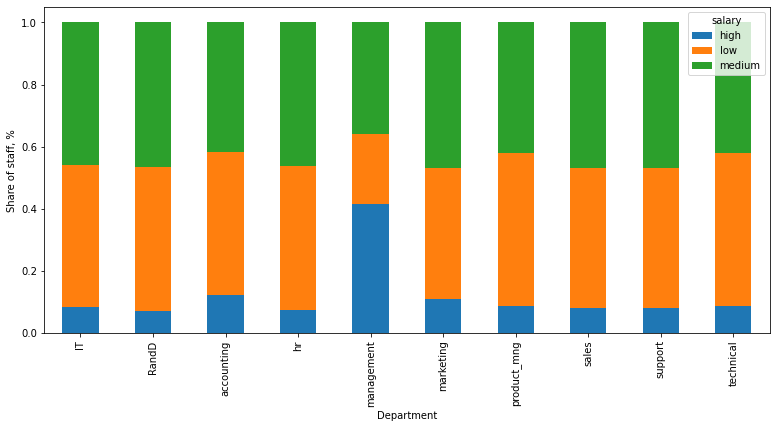

In [57]:
# рассмотрим также доли разных категорий зарплат по отделам
dept_salary_norm = staff.groupby('department')['salary'].value_counts(normalize=True)

dept_salary_norm.unstack('salary').plot.bar(xlabel='Department', ylabel='Share of staff, %', stacked=True)

В менеджменте большую долю состаляют сотрудники с высокой и средней зарплатой. В остальных отделах сотрудников с низкой и средней зарплатой примерно одинаковое количество.

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

Н1: среднее количество часов на рабочем месте в месяц для высокооплачиваемых сотрудников выше, чем для низкооплачиваемых.  
Н0: среднее количество часов на рабочем месте в месяц для высокооплачиваемых сотрудников ниже, чем для низкооплачиваемых.  

Рассчитываем односторонний тест для независимых групп.

Уровень значимости - 0.05.

In [14]:
# проверяем общую гипотезу, поэтому кажется более логичным взять весь массив данных, без разделения на текущих и бывших сотрудников
high_salary = df.loc[df['salary']=='high']['average_montly_hours']
low_salary = df.loc[df['salary']=='low']['average_montly_hours']

result = stats.ttest_ind(high_salary, low_salary, equal_var=False, alternative='greater')
print(result)
print()

if result.pvalue <= 0.05:
    print('Н0 отвергаем: высокооплачиваемые сотрудники меньше работают.')
else:
    print('Н0 не отергаем: высокооплачиваемые сотрудники больше работают.')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.7770477228871056)

Н0 не отергаем: высокооплачиваемые сотрудники больше работают.


## 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
●Доля сотрудников с повышением за последние 5 лет  

In [35]:
promoted = df.loc[df['promotion_last_5years']==1]['left'].value_counts(normalize=True)
print(promoted)
print()

print('Доля сотрудников с повышением за последние 5 лет среди:')
print(f'текущего персонала - {round(promoted[0]*100, 2)}%')
print(f'уволившихся - {round(promoted[1]*100, 2)}%')

0    0.940439
1    0.059561
Name: left, dtype: float64

Доля сотрудников с повышением за последние 5 лет среди:
текущего персонала - 94.04%
уволившихся - 5.96%


●Средняя степень удовлетворенности  

In [39]:
satisfaction = df.groupby('left')['satisfaction_level'].mean()
print(satisfaction)
print()

print('Средняя степень удовлетворенности среди:')
print(f'текущего персонала - {round(satisfaction[0]*100, 2)}%')
print(f'уволившихся - {round(satisfaction[1]*100, 2)}%')

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Средняя степень удовлетворенности среди:
текущего персонала - 66.68%
уволившихся - 44.01%


●Среднее количество проектов 

In [44]:
projects = df.groupby('left')['number_project'].mean()
print(projects)
print()

print('Среднее количество проектов среди:')
print(f'текущего персонала - {round(projects[0], 2)}')
print(f'уволившихся - {round(projects[1], 2)}')

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

Среднее количество проектов среди:
текущего персонала - 3.79
уволившихся - 3.86


Подавляющее число получивших повышение находится среди текущих сотрудников (94%). Удовлетворенность также выше среди текущих, чем среди уволенных. А вот среднее количество проектов у уволившихся немного выше, чем у текущих: 3.86 против 3,79. Возможно люди увольнялись, потому что их работа не была оценена должным образом и они не получали повышение.

## 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [50]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, [0, 1, 2, 3, 4, 5, 7]]
y = df['left']

# разделим тестовую и тренировочную выборки в соотношении 25х75
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Тренировочная выборка: ', len(y_train))
print('Тестовая выборка: ', len(y_test))

Тренировочная выборка:  11249
Тестовая выборка:  3750


In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7536

Качество модели получилось невысокое.   
Возможно стоит добавить больше показателей, основанных на субъективном восприятии сотрудниками корпоративной культуры, относительного уровня заработной платы, возможностей карьерного роста.